<a href="https://colab.research.google.com/github/kocelifk/Kural_Tabanli_Siniflandirma/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from subprocess import check_output

In [ ]:
data = pd.read_csv('/content/column_2C_weka.csv')
plt.style.use('ggplot')

# Makine Öğrenmesi
Python içinde makine öğrenmesi kütüphaneleri olarak sklearn, keras ve tensorflow vardır.

Supervised Learning: Etiketi olan veriler kullanılır. Ortopedi hastaları için normal ve anormal etiketlerinin bulunması gibi. Feature ve target değişkene sahip olduğumuz durumda supervised learning kullanılır. Hedef değişken normal veya anormal iken featurelar pelvik  yarıçap, sakral eğim gibi değişkenlerdir. Amaç verilen featurelara göre target değişkeninin değerinin ne olduğunu bulabilmektir. Classification: target değişken normal veya anormal gibi kategorilerden oluşur. Regression: target değişken borsa gibi süreklidir.

In [ ]:
data.head() #featureları ve target değişkenin görüntülenmesi

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [ ]:
data.info() #verinin uzunluğu ve NaN değerlerin olup olmadığına bakılması
#class: target değişken
#featurelar float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [ ]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


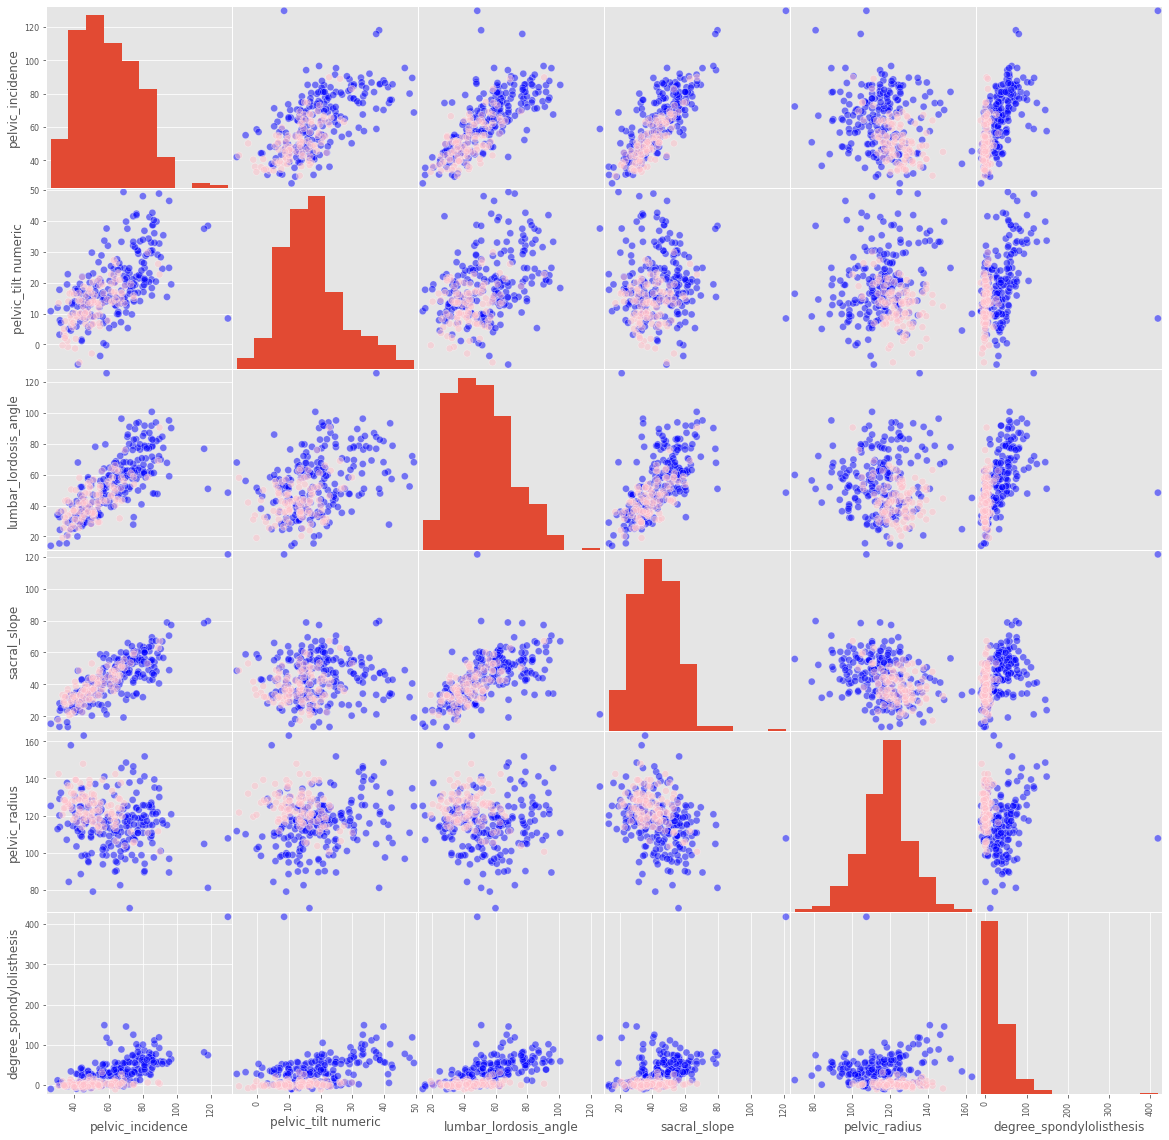

In [ ]:
color_list = ['blue' if i=='Abnormal' else 'pink' for i in data.loc[:, 'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'], 
                                                  c=color_list,
                                                  figsize=[20,20],
                                                  diagonal='hist',
                                                  alpha=0.5,
                                                  s = 200,
                                                  marker='.',
                                                  edgecolor="white")
plt.show()

#https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

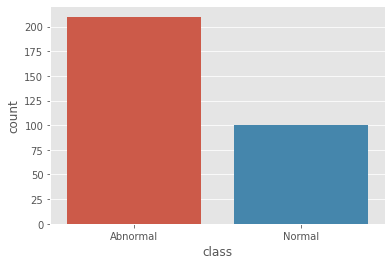

In [ ]:
sns.countplot(x="class", data=data)

In [ ]:
data.loc[:,'class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

## K-Nearest Neighbors (KNN)
* En yakın k tane etiketli veri noktasına bakılır
* Sınıflandırma methodudur
* Verinin öncelikle train edilmesi gereklidir. train = fit
* fit(): veriyi fit eder, veriyi train eder
* predict(): veriyi tahmin eder
* x: features 
* y: target değişkenleri --> normal, abnormal
* n_neighbors: K. --> örnekte 3 kullanılacak. en yakın etiketlenmiş 3 veri noktasına bakılacak




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:, data.columns != 'class'], data.loc[:, 'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

Veriyi fit ettik ve KNN ile tahmin ettik.
Tahmin ettiğimiz sonuçların accuracy değerleri nedir, accuracy tahmin sonucunu değerlendirmek için en iyi metrik midir?

Verileri x yani featurelar ile eğittik ve yine x ile tahmin ettik. Modelin görmediği veri seti ile tahmin yapılması gerekmektedir.
Bu sebeple veriyi train ve test olarak ayırıyoruz. 

* train: fit etmek için train kullanılır.
* test: predict için kullanılır.
* train ve test setleri ile birlikte fit edilen data ile predict edilen data tamamen farklı olmuş olacak.
* Bunun için kullanılan fonksiyon: train_test_split()
* train_test_split(x,y,test_size = 0.3, random_state = 1)
-> x: featurelar
-> y: target değişkeni (normal, abnormal)
-> test_size: test verisinin büyüklüğü. Veriyi yüzde 30u test verisi, yüzde 70'i train verisi olacak şekilde ayırmak.
-> random_state: seed ayarlar. bu seed aynı sayı isei train_test_split() her seferinde tam olarak aynı bölünmeyi üretir. 
* fit(x_train, y_train): train setinde fit edilmesi
* score(x_test, y_test):  test setinde tahmin yapılması ve doğruluk sağlanması

In [ ]:
from sklearn. model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:, data.columns != 'class'], data.loc[:, 'class']
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
#print('Prediction : {}'.format(prediction))
print('With KNN (K=3) accuracy is', knn.score(x_test, y_test))

With KNN (K=3) accuracy is 0.8602150537634409


K=3 olarak neden seçildi? K hangi değer olarak seçilmelidir?
Model karmaşıklığı:
- K gelen adlandırmadır. Hiperparametre olarak adlandırılır. En iyi performansı verecek olan K değeri seçilmelidir.
- Literatür, k eğer küçükse model karmaşıktır bu da overfite sebep olur der.Bunun anlamı model train setini ezberler test setinde iyi bir accuracy değerine sahip olarak tahmin işlemini gerçekleştiremez.
- Eğer k büyükse, model karmaşık değildir ve underfite sebep olur.


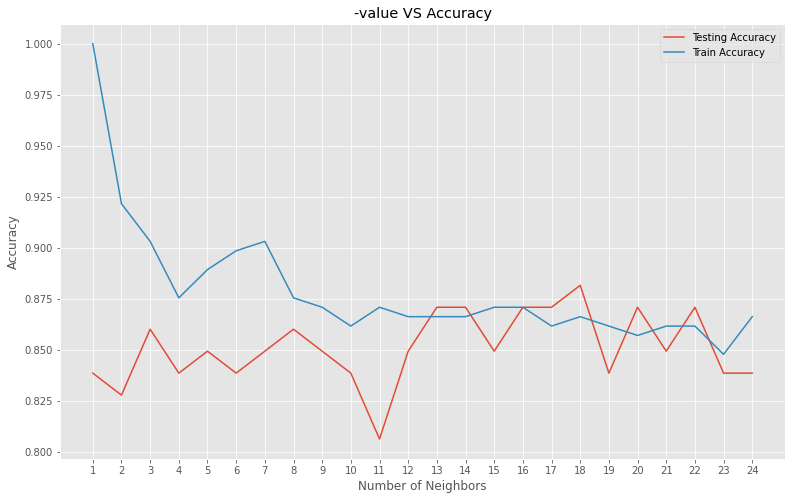

Best accuracy is 0.8817204301075269 with K = 18


In [ ]:
#1'den 25'e kadar olan her bir K değeri için accuracy hesaplaması yapıyoruz.
#K 1 olduğunda train veri seti ezberlenir, overfitting oluşur.
#K 18 olduğunda test setindeki accuracy değeri en yüksek değere sahiptir --> %88

#Model Complexity

neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(neig):
  #1'den 25'e kadar -> 25 hariç
  knn=KNeighborsClassifier(n_neighbors = k)
  #knn ile fit edilmesi
  knn.fit(x_train, y_train)
  #train accuracy
  train_accuracy.append(knn.score(x_train, y_train))
  #test accuracy
  test_accuracy.append(knn.score(x_test, y_test))

  #Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Train Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))


## REGRESSION
* Supervised learning
* Lineer ve lojistik regresyon
* Ortopedik hasta verileri regresyon için uygun değil. Bu sebeple sadece sacral_slope ve pelvic_incidence anormalliğe ait olmak üzere featureları kullanılacak
* Feature --> pelvic_incidence
* Target --> sacral_slope
* reshape(-1,1): eğer kullanılmazsa x veya y (210,) olur
ve sklearn kullanamayız, bu sebeple reshape(-1,1) kullanırız ve x veya y'nin shape'i (210,1) olur.

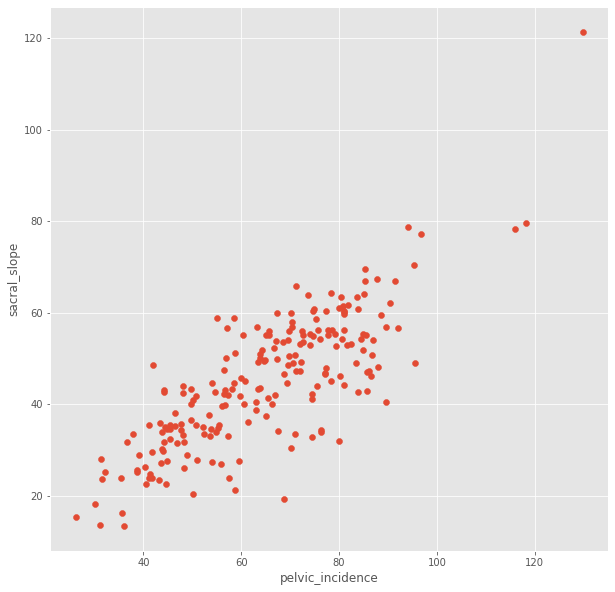

In [ ]:
#Feature olarak pelvic_incidence ve target olarak sacral_slope oluşturulur.

data1 = data[data['class'] == 'Abnormal']
x=np.array(data1.loc[:, 'pelvic_incidence']).reshape(-1,1)
y=np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
#Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

Regresyon yapmak için yeterli veriye sahibiz. Regresyon problemlerinde hedef değişken sürekli(continuous) değişkendir. Bu noktalara line fit edilmeli.

### Lineer Regresyon
* y= ax+b ise modele ait x ve y değişkenleri için; y --> hedef değişken x --> feature

* Modelin parametrelerini minimum hata fonksiyonuna göre yani lost fonksiyona göre seçiyoruz.

* Lineer regresyonda Ordinary Least Square(OLS) kullanıyoruz.

* OLS Residual(artıkların) toplamıdır. Ancak bazı pozitif ve negatif residuallar birbirini iptal edebilir, bu sebeple residualların karesini toplarız. Buna OLS denir.

* Score: skor R^2 metodunu kullanır. (y_pred-y_mean)^2 / (y_actual - y_mean) ^ 2


R^2 score:  0.6458410481075871


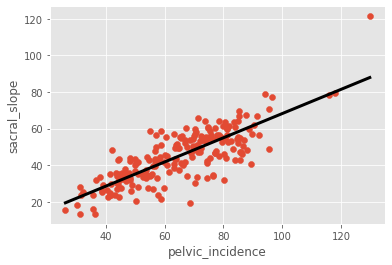

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

#Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)

#fit
reg.fit(x,y)

#predict
predicted = reg.predict(predict_space)

#R^2
print('R^2 score: ', reg.score(x, y))

#Plot regression line and scatter

plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

### Cross Validation
KNN'de her seferde train ve test olarak aynı bölünebilmesini sağlayan random_state kullanıyoruz. Ancak random_state kullanmazsak veri her seferinde farklı bölünür. Bu durumda accuracy bölünmeye göre farklılık gösterecektir. Bu nedenle model performansının train_test_split'e bağlı olduğu sonucuna varabiliriz. Örneğin veriyi 5 kere split edip, fit edip, predict edersek accuracy sırasıyla 0.89, 0.9, 0.91, 0.92, 0.93 olacaktır.
Hangi accuracy kullanılmalı? 6.defa split edilip, fit ve predict sonrası accuracy'nin ne olacağını biliyor muyuz? Bilmiyoruz. Cross validation kullanırsak kabul edilebilir accuracy değerine ulaşırız.

Cross Validation (CV)
* K fold - K fold cv
* K büyüdüğünde hesaplama maliyeti artar
* corss_val_score(reg, x, y, cv=10)-->reg(lineer regresyon) kullanılır, 10 kere split, train ve predict işlemleri gerçekleşir.


In [ ]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k=5
cv_result = cross_val_score(reg,x,y,cv=k) #R^2 score kullanılır
print("CV Score: ", cv_result)
print("CV Scores Average: ", np.sum(cv_result)/k)

CV Score:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV Scores Average:  0.3931462502884869


### Regularized Regression

Lineer regresyonda lost fonksiyonunu minimize eden parametreler seçileceğini biliyoruz.
Lineer regresyon featurelarından birinin önemli olduğunu bilirse ona yüksek coefficent(katsayı) verir. 
Ancak bu KNN için overfittinge sebep olabilir.
Overfittingden kaçınmak için yüksek katsayıları cezalandırmayı sağlayan **regularization** kullanıyoruz

### Ridge Regression : L2 regularization olarak da adlandırılır.
* Ridge regresyon; lost fonksiyonu: OLS + alpha * sum(parameter^2)
* alpha, fit ve predict için ihtiyaç duyulan parametre
* alpha'nın seçimi KNN'deki k seçimine benzer
* En iyi accuracy ve en iyi model karmaşıklığı için seçmemiz gereken hiperparametre.
* Bu işleme hiperparametre tuning (ayarlama) denir.
* Alpha değeri çok küçükse bu overfittinge sebep olur. 
* Alpha değeri çok büyükse bu underfittinge sebep olur.
* 'Çok küçük' ve 'çok büyük' ölçüsünün ne olduğu sorulacak olursa bu problemden probleme değişen bir ölçüttür.


### Lasso Regression: L1 regularization olarak da adlandırılır.
* Lost fonksiyonu = OLS + alpha * sum(absolute_value(parameter))
* Veriye ait en önemli feature'ları seçmek için kullanılabilir.



In [ ]:
#Ridge

from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train, y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge Score: ', ridge.score(x_test, y_test))

Ridge Score:  0.5608287918841997


In [ ]:
from sklearn.linear_model import Lasso
x=np.array(data1.loc[:, ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'pelvic_radius']])
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train, y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ', lasso.score(x_test, y_test))
print('Lasso coefficients: ', lasso.coef_)

Lasso score:  0.9640334804327547
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]


pelvic_incidence ve pelvic_tilt numeric önemli feature'lar iken diğerleri değildir. 
Accuracy model seçimi için yeterli bir metrik midir?
Örneğin veride %95 normal ve %5 anormal sample içeriyor ve ölçüm model ölçüm metriği olarak accuracy kullanılıyor. 
Bu durumda model tüm sample'lar için %100 normal **tahmininde** bulunur. Accuracy ise %95 olur. Bütün anormal samplelar yanlış sınıflandırılmış olur. Bu sebeple dengesiz veri setlerinde model ölçüm metriği olarak confusion matrixi kullanmamız gerekiyor. Confusion matrixi random forest sınıflandırıcısının kullanılmasına izin verir. 




In [ ]:
#Confusion Matrix ve Random Forest

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

x, y = data.loc[:, data.columns != 'class'], data.loc[:,'class']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
cm=confusion_matrix(y_test, y_pred) 
print('Confusion Matrix: \n', cm)
print('Classification report: \n', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[60  6]
 [ 8 19]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.88      0.91      0.90        66
      Normal       0.76      0.70      0.73        27

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.81        93
weighted avg       0.85      0.85      0.85        93



In [ ]:
#sns.heatmap(cm, annot ="True",    fmt='g')
#plt.show()

ValueError: ignored

#Lojistik Regresyon ile ROC Curve
* Lojistik regresyonun çıktısı olasılıklardır
* Eğer olasılıklar 0.5'ten büyükse veri abnormal olarak etiketlenir, tersi durumda normal olarak etiketlenir.
* Lojistik regresyon için default threshold 0.5'tir.
* ROC: Receiver Operating Characteristic = True Positive Rate / False Positive Rate
* Sınıflandırma problemlerini çözmek için kurduğumuz modellerin iyi çalışıp çalışmadığını anlamamıza yarayan metriktir.
* x ekseni false positive oranını veriyorken y ekseni true positive oranını verir.
* Grafikteki eğri sol üst köşeye yakınsa test daha doğrudur.
* Roc eğrisinin altındaki alan AUC olarak adlandırılır. 
* Auc değerinin 1'e yakın olmasını isteriz. 


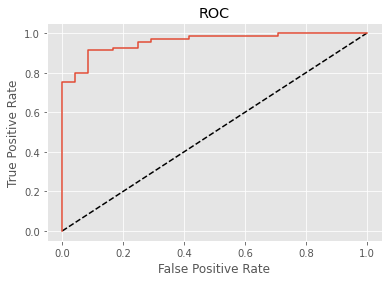

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
#anormal --> 1 normal --> 0
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:, 'class']]
x, y = data.loc[:, (data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:, 'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr,tpr, thresholds = roc_curve(y_test, y_pred_prob)
#plot roc curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### Hyperparametre Tuning
* KNN'de bahsedildiği gibi ayarlanması(tuning) gereken parametreler vardır.
Örneğin;
* KNN'deki k
* Ridge ve Lasso'dali alpha
* Random Forest'taki max_depth
* Lineer regresyon parametreleri (coefficients)

Hiperparametre ayarlaması;
* farklı parametrelere ait tüm kombinasyonlar denenir
* hepsi fit edilir
* prediction performansı ölçülür
* her birinin ne kadar iyi performans gösterdiği incelenir
* en iyi parametreler seçilir

GridSearchCV 
* k: 1'den 50'ye kadar(50 dahil değil)
* Tüm hiperparametrelerin kombinasyonunda arama yapar


In [ ]:
#Grid Search & Cross Validation & 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv = 3)
knn_cv.fit(x, y)

print('Tuned hyperparameter k: {}'.format(knn_cv.best_params_))
print('Best Score: {}'.format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 4}
Best Score: 0.7559434901667911


2 hiperparametre ile GridSearch örneği:
* İlk hiperparametre C--> lojistik regresyon regularization parameter
--Eğer C çok büyükse: overfit
--Eğer C çok küçükse: underfit
* İkinci hiperparametre penalty (cezalandırma) (lost function): L1(LASSO) ve L2(Ridge)

In [ ]:
param_grid = {'C': np.logspace(-3,3,7), 'penalty': ['l1','l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 12)
logreg= LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv = 3)
logreg_cv.fit(x_train, y_train)

print('Tuned hyperparameters: {}'.format(logreg_cv.best_params_))
print('Best Accuracy: {}'.format(logreg_cv.best_score_))

Tuned hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.8572425164890919


### Pre-Processing Data

* Gerçek hayat problemlerinde veriler kategorik olabilir, sklearn kütüphanesini kullanabilmek için bunları sayısal verilere çevirmemiz gereklidir.

* Verideki sınıf; normal ve anormaldir. Bunları numerik veriye çevirmemiz gereklidir. 

*class_Abnormal ve class_Normal olmak üzere 2 farklı feature oluşturulmuştur.

* Duplicate oldukları için bir tanesinin drop edilmesi gerekmektedir.



In [ ]:
data = pd.read_csv('/content/column_2C_weka.csv')
df = pd.get_dummies(data)
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1,0
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,1,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1,0


In [ ]:
#Feature'lardan birinin drop edilmesi
df.drop("class_Normal", axis=1, inplace=True)
df.head(10)

#Bu iki adım yerine tek bir adımda da tamamlayabilirdik --> pd.get_dummies(data, drop_first = True)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


Ön işleme adımlarından diğeri scale etme veya normalizasyondur.


In [ ]:
#SVM, preprocess ve pipeline

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)
parameters = {'SVM__C': [1,10,100],
              'SVM__gamma': [0.1, 0.01]}

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=1)
cv= GridSearchCV(pipeline, param_grid = parameters, cv = 3)
cv.fit(x_train, y_train)

y_pred = cv.predict(x_test)

print('Accuracy: {}'.format(cv.score(x_test, y_test)))
print('Tuned Model Paarameters: {}'.format(cv.best_params_))

Accuracy: 0.8548387096774194
Tuned Model Paarameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


### Unsupervised Learning

* Etiketlenmemiş verileri kullanır ve etiketlenmemiş verilerden gizli örüntüleri yakalar.
* Örneğin etiketi olmayan ortopedik hasta verilerine sahibiz. Hangi hastanın normal hangisinin anormal olduğunu bilemeyiz. 
* Ortopedik hasta verileri etiketlenmiş veriye sahipti, yani target featurea sahibiz. Bu sebeple denetimsiz öğrenme üzerinde çalışabilmemiz için target değişkeni drop edelim.

Denetimsiz öğrenme yöntemlerinden olan KMeans deneyelim.



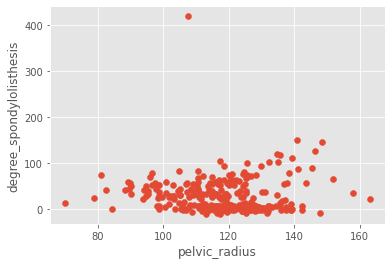

In [ ]:
#Görülebileceği üzere veride etiket bulunmuyor
data = pd.read_csv('/content/column_2C_weka.csv')
plt.scatter(data['pelvic_radius'], data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

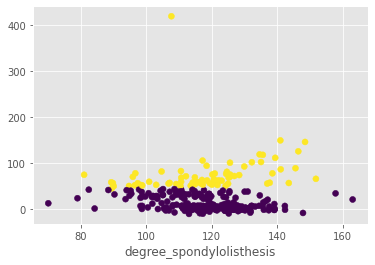

In [ ]:
#KMeans Clustering

data2 = data.loc[:, ['degree_spondylolisthesis', 'pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'], data['degree_spondylolisthesis'], c= labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

### Clustering Evaluating (Kümeleme Değerlendirmesi)
Verileri iki grupta topluyoruz. Peki bu doğru kümeleme midir ? Kümelemenin doğruluğunu değerlendirmek için cross tabulation tablosu kullanacağız. 
* 0 ve 1 olmak üzere iki küme vardır. 
* 0 kümesi 138 anormal ve 100 normal hasta içermektedir.
* 1 kümesi 72 anormal ve 0 normal hasta içermektedir. 

* Her iki küme için de anormal hastalar çoğunluktadır. 

In [ ]:
#Cross Tabulation Table
df = pd.DataFrame({'labels': labels, "class": data['class']})
ct = pd.crosstab(df['labels'], df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


Kaç tane veri olduğunu bildiğimiz ama kaç tane sınıf olduğunu bilmediğimiz bir veriye sahip olursak?
Bu KNN'deki veya regresyondaki hiperparametre gibidir. 

* intertia: her bir örnekten kümelerin ne kadar uzakta olduğudur

* düşük intertia değeri daha fazla küme anlamına gelir.

* En iyi küme sayısı nedir?

* Düşük intertia vardır. Çok fazla cluster değişimi yoktur. Bu nedenle elbow seçebiliriz.

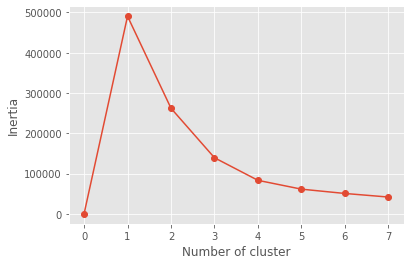

In [ ]:
inertia_list = np.empty(8)
for i in range(1,8):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(data2)
  inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8), inertia_list, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

### Standartlaştırma

* Supervised ve unsupervised learning için önemlidir.
* Preprocessing işlemlerinde standartlaştırmanın atlanmaması gerekmektedir.

In [ ]:
data = pd.read_csv('/content/column_3C_weka.csv')
data3 = data.drop('class', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar, kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels': labels, "class":data['class']})
ct = pd.crosstab(df['labels'], df['class'])
print(ct)

class   Hernia  Normal  Spondylolisthesis
labels                                   
0           58      90                 36
1            2      10                114


### Hierarchy
* Dikey çizgiler kümelerdir.
* Dendogramın yüksekliği: birleşen kümeler arasındaki mesafedir.
* method-->single; kümelere en yakın nokta


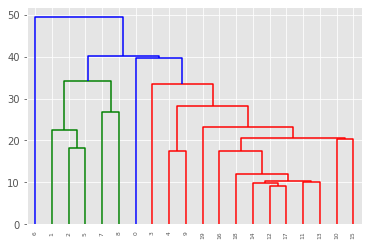

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(data3.iloc[200:220,:], method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size =6)
plt.show()

### T-Distributed Stochastic Neighbor Embedding (T-SNE)
* learning rate: 50-200 olması normaldir.
* fit_transform: 

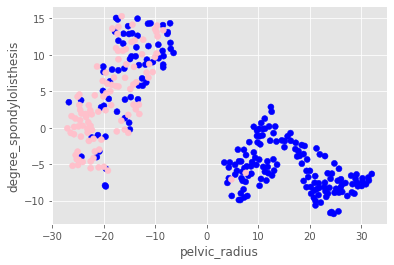

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100)
transformed = model.fit_transform(data2)
x= transformed[:, 0]
y=transformed[:, 1]
plt.scatter(x,y,c = color_list)
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

### PRINCIPLE COMPONENT ANALYSIS (PCA)
* Temel boyut küçültme tekniğidir. 
* İlk adım de-korelasyondur
--> eksenlerle hizalanacak şekilde data sample larını döndürür
--> data sample larını ortalama 0 olacak şekilde kaydırır
--> bilgi kaybı olmaz
--> fit(): sample ları nasıl shift edileceğinin öğrenilmesi
--> transform(): öğrenilen bilginin uygulanması. Test verisine de uygulanabilir
* Ortaya çıkan PCA özellikleri doğrusal olarak ilişkili değildir.
* Temel bileşenler: varyans yönleri

In [ ]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ', model.components_)

Principle components:  [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [-4.76634849e-01 -9.85632787e-02 -5.32783979e-01 -3.78071570e-01
   3.21809199e-01  4.82438036e-01]
 [-1.54481282e-03 -2.64657410e-01 -4.96541893e-01  2.63112598e-01
  -7.74612852e-01  1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [-4.41703869e-01  7.35414748e-02  5.12024113e-01 -5.15245344e-01
  -5.14639730e-01  8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08928977e-11 -5.77350269e-01
  -3.59066943e-12  3.06732417e-12]]


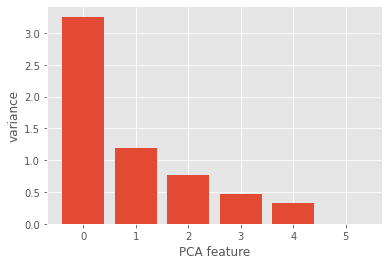

In [ ]:
#PCA variance

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

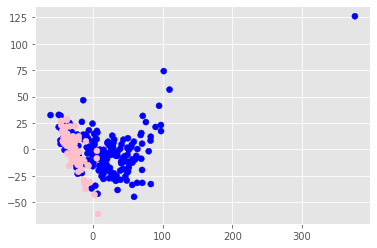

In [ ]:
#PCA uygulanması

pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)
x= transformed[:, 0]
y=transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.show()